## Setup

In [2]:
import sys
print(sys.version)
print(sys.version_info)


3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=7, releaselevel='final', serial=0)


In [3]:
!python --version
!pip --version

Python 3.11.7


pip 23.3.1 from d:\programs\python38\lib\site-packages\pip (python 3.8)



In [1]:
ls

 Volume in drive D is DATA
 Volume Serial Number is 1646-E442

 Directory of d:\models\9.CrowdDetection-DroneVision\CSRNet-Keras

02/05/2024  09:44 AM    <DIR>          .
01/30/2024  11:04 AM    <DIR>          ..
01/16/2024  05:01 PM             1,307 .gitignore
01/24/2024  06:05 PM    <DIR>          .ipynb_checkpoints
02/01/2024  04:45 PM    <DIR>          __pycache__
01/31/2024  05:54 PM         6,455,484 Crowd-densityMap-Video.ipynb
02/01/2024  03:03 PM         6,455,484 Crowd-densityMap-Video1st.ipynb
01/31/2024  02:36 PM         5,720,624 Crowd-density-Model.ipynb
01/31/2024  02:44 PM         5,720,624 Crowd-density-Model-test.ipynb
02/01/2024  03:05 PM       205,138,447 Crowd-density-video_p310.ipynb
02/01/2024  04:36 PM       205,132,335 Crowd-density-video_p311.ipynb
02/01/2024  03:26 PM        44,600,501 Crowd-density-video_p36.ipynb
01/25/2024  09:33 AM            42,308 CSRNet.png
01/16/2024  05:01 PM             2,998 CSRNet.py
01/27/2024  04:27 PM        65,113,144 CSRNet_

In [5]:
cd CSRNet-Keras

[WinError 2] The system cannot find the file specified: 'CSRNet-Keras'
d:\models\9.CrowdDetection-DroneVision\CSRNet-Keras


d:\Programs\anaconda3\envs\crowd311\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


## Model access

In [5]:
import h5py
print(h5py.__version__)
import cv2
print(cv2.__version__)
import tensorflow
print(tensorflow.__version__)
import keras
print(keras.__version__)
import scipy
print(scipy.__version__)
import tqdm
print(tqdm.__version__)
import matplotlib
print(matplotlib.__version__)
# import numpy
# print(numpy.__version__)

3.10.0
4.9.0

2.15.0
2.15.0
1.12.0
4.66.1
3.8.2


In [2]:
import os
from keras.optimizers import Adam
from CSRNet import CSRNet

# Settings of network
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
LOSS = 'MSE'
optimizer = Adam(learning_rate=1e-5)

# Create my model
model = CSRNet(input_shape=(None, None, 3))
model.compile(optimizer=optimizer, loss='MSE')

# Load the weights
model_path = "weights_A_MSE_bestMAE72.586_Wed-Jan-31/CSRNet_best.hdf5"
model.load_weights(model_path)

d:\Programs\anaconda3\envs\crowd311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [7]:
# Get the weights
weights = model.get_weights()

In [8]:

# print the details of weights
for i , weight in enumerate(weights):
    print(f"Weight {i}:")
    print(f"Shape: {weight.shape}")
    #print(f"Values: {weight}")

Weight 0:
Shape: (3, 3, 3, 64)
Weight 1:
Shape: (64,)
Weight 2:
Shape: (3, 3, 64, 64)
Weight 3:
Shape: (64,)
Weight 4:
Shape: (3, 3, 64, 128)
Weight 5:
Shape: (128,)
Weight 6:
Shape: (3, 3, 128, 128)
Weight 7:
Shape: (128,)
Weight 8:
Shape: (3, 3, 128, 256)
Weight 9:
Shape: (256,)
Weight 10:
Shape: (3, 3, 256, 256)
Weight 11:
Shape: (256,)
Weight 12:
Shape: (3, 3, 256, 256)
Weight 13:
Shape: (256,)
Weight 14:
Shape: (3, 3, 256, 512)
Weight 15:
Shape: (512,)
Weight 16:
Shape: (3, 3, 512, 512)
Weight 17:
Shape: (512,)
Weight 18:
Shape: (3, 3, 512, 512)
Weight 19:
Shape: (512,)
Weight 20:
Shape: (3, 3, 512, 512)
Weight 21:
Shape: (512,)
Weight 22:
Shape: (3, 3, 512, 512)
Weight 23:
Shape: (512,)
Weight 24:
Shape: (3, 3, 512, 512)
Weight 25:
Shape: (512,)
Weight 26:
Shape: (3, 3, 512, 256)
Weight 27:
Shape: (256,)
Weight 28:
Shape: (3, 3, 256, 128)
Weight 29:
Shape: (128,)
Weight 30:
Shape: (3, 3, 128, 64)
Weight 31:
Shape: (64,)
Weight 32:
Shape: (1, 1, 64, 1)
Weight 33:
Shape: (1,)


## Test new image dataset

1/1 [==============================] - 1s 1s/step


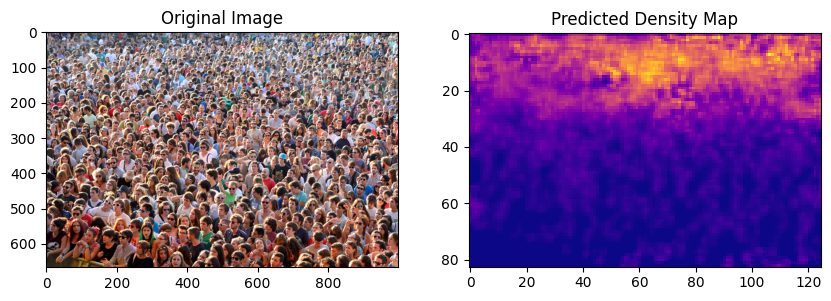

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "data/R.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Normalize the density map values to be in the range [0, 1] for better visualization
normalized_density_map = predicted_density_map / np.max(predicted_density_map)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Display the predicted density map as a heatmap
plt.subplot(1, 2, 2)
plt.imshow(normalized_density_map[0, :, :, 0], cmap='plasma', interpolation='nearest')
plt.title('Predicted Density Map')

plt.show()

1/1 [==============================] - 1s 814ms/step


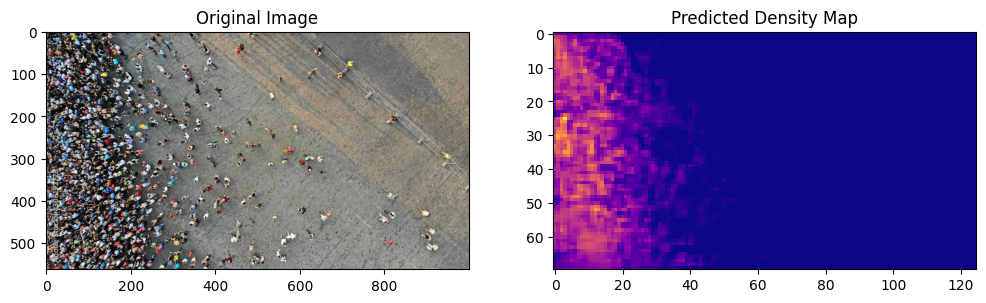

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "data/1000_F.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma', interpolation = 'nearest')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

1/1 [==============================] - 1s 537ms/step


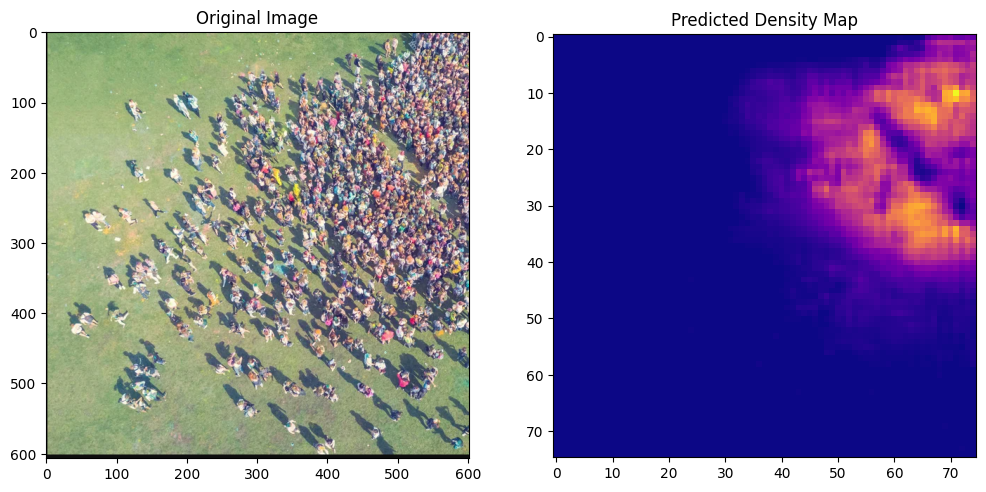

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "data/101734.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma', interpolation = 'nearest')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

1/1 [==============================] - 1s 744ms/step


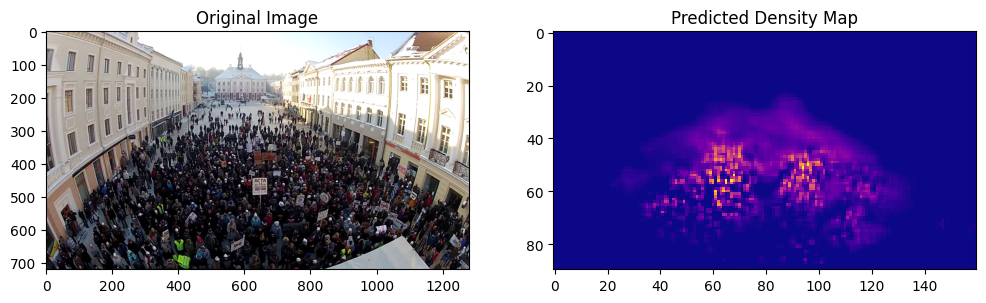

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "data/vlcsnap2012021221h55m01s134.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma', interpolation = 'nearest')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

1/1 [==============================] - 1s 921ms/step


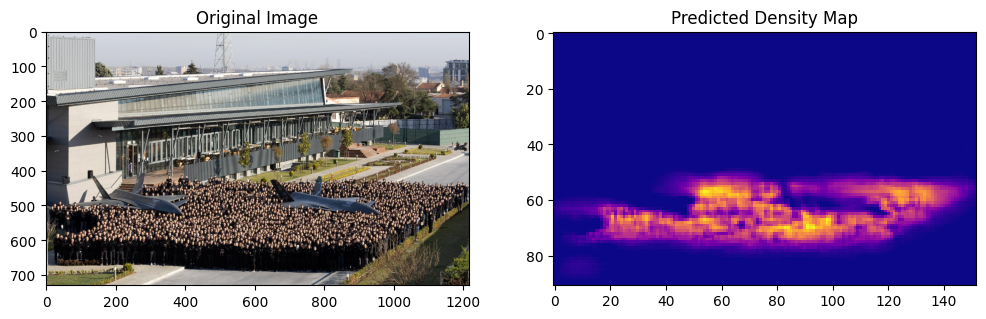

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "data/crowd.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma', interpolation = 'nearest')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

1/1 [==============================] - 2s 2s/step


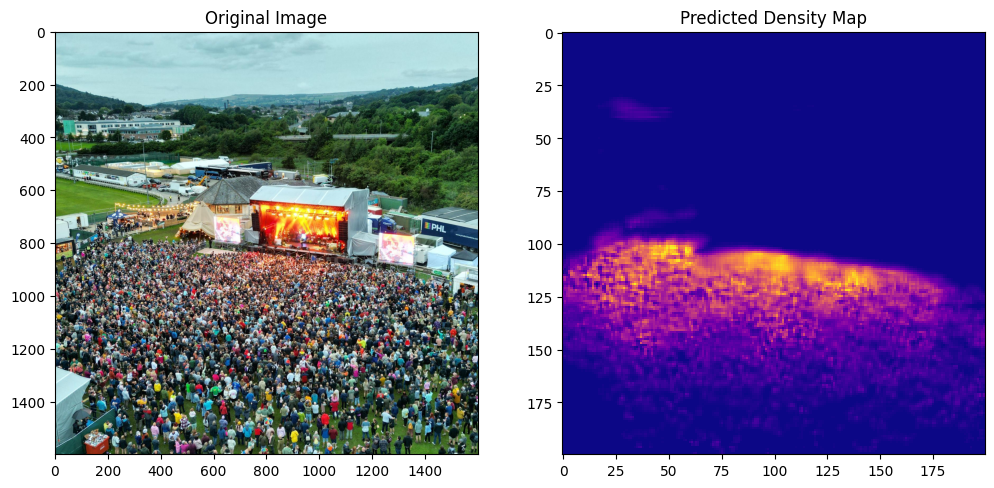

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "data/Bingley-Weekender-Crowd-Drone-1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma', interpolation = 'nearest')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

1/1 [==============================] - 1s 644ms/step


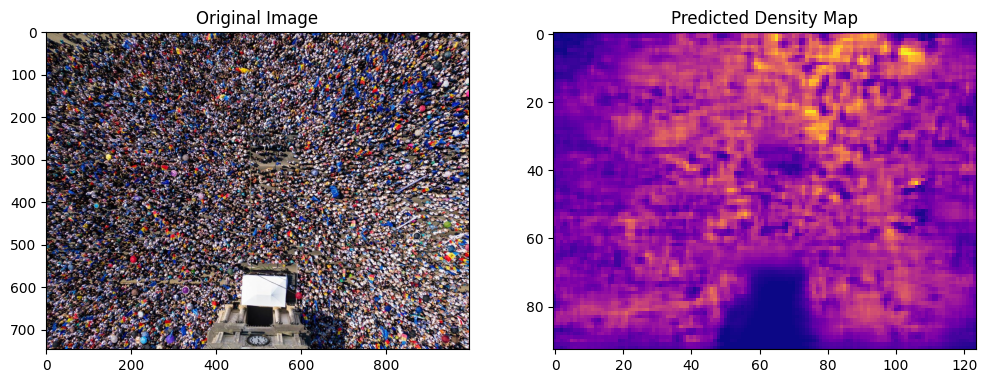

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "data/aerial-drone-vertical-view-1268-23493.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma', interpolation = 'nearest')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

## Test Video dataset

In [9]:
# 2nd

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your model - replace 'your_model.h5' with the actual path to your model file
# model = keras.models.load_model('your_model.h5')

# Function to preprocess a frame and apply the model
def process_frame(frame):
    # Preprocess the frame (resize or normalize based on your training preprocessing)
    # Ensure the preprocessing is consistent with what was done during training
    # For example, you may need to resize the frame to match the input size used during training

    # Resize the frame to match the input size used during training
    input_frame = cv2.resize(frame, (224, 224), interpolation=cv2.INTER_LINEAR)  # Change interpolation method if needed

    # Normalize the frame if needed
    input_frame = input_frame / 255.0  # Example normalization, adjust as per your training

    # Expand dimensions to create a batch of size 1 (as the model expects batches)
    input_image = np.expand_dims(input_frame, axis=0)

    # Make predictions
    predicted_density_map = model.predict(input_image)

    return predicted_density_map

# Replace 'input_video.mp4' with the path to your video file
input_video_path = 'data/pexels-timo-volz-5544073(1080p).mp4'

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open the video file.")
    exit()

# Get the default width and height of the frame
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Set the desired output width and height to match the original frame size
output_width = frame_width
output_height = frame_height

# Define the codec and create a VideoWriter object with the new size
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can change the codec as needed
output_video_path = 'output_video.avi'
out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (output_width, output_height))

while True:
    # Read a frame from the video file
    ret, frame = cap.read()

    if not ret:
        print("End of video.")
        break

    # Process the frame and apply the model
    predicted_density_map = process_frame(frame)

    # Normalize the predicted density map values to be in the range [0, 1]
    normalized_density_map = (predicted_density_map - np.min(predicted_density_map)) / (np.max(predicted_density_map) - np.min(predicted_density_map))

    # Convert the normalized density map to a grayscale image
    heatmap_gray = (normalized_density_map[0, :, :, 0] * 255).astype(np.uint8)

    # Apply the 'plasma' colormap
    heatmap_colored = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_PLASMA)

    # Resize the heatmap to match the original frame size
    heatmap_resized = cv2.resize(heatmap_colored, (frame_width, frame_height), interpolation=cv2.INTER_LINEAR)

    # Visualize the original frame
    cv2.imshow('Original Video', frame)

    # Visualize the predicted density map with 'plasma' colormap
    cv2.imshow('Predicted Density Map', heatmap_resized)

    # Write the frame to the output video file
    out.write(heatmap_resized)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release everything when the job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 63ms/step


In [10]:
# 3 orginial size

import cv2
import numpy as np

# Load your model - replace 'your_model.h5' with the actual path to your model file
# model = keras.models.load_model('your_model.h5')

# Function to preprocess a frame and apply the model
def process_frame(frame):
    # Preprocess the frame (resize or normalize based on your training preprocessing)
    # Ensure the preprocessing is consistent with what was done during training
    # For example, you may need to resize the frame to match the input size used during training

    # Resize the frame to match the input size used during training
    input_frame = cv2.resize(frame, (224, 224), interpolation=cv2.INTER_LINEAR)  # Change interpolation method if needed

    # Normalize the frame if needed
    input_frame = input_frame / 255.0  # Example normalization, adjust as per your training

    # Expand dimensions to create a batch of size 1 (as the model expects batches)
    input_image = np.expand_dims(input_frame, axis=0)

    # Make predictions
    predicted_density_map = model.predict(input_image)

    return predicted_density_map

# Replace 'input_video.mp4' with the path to your video file
input_video_path = 'data/pexels-timo-volz-5544073(1080p).mp4'

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open the video file.")
    exit()

# Set the desired output width and height
output_width = 640
output_height = 640

# Define the codec and create a VideoWriter object with the new size
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can change the codec as needed
output_video_path = 'output_video.avi'
out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (output_width, output_height))

while True:
    # Read a frame from the video file
    ret, frame = cap.read()

    if not ret:
        print("End of video.")
        break

    # Process the frame and apply the model
    predicted_density_map = process_frame(frame)

    # Normalize the predicted density map values to be in the range [0, 1]
    normalized_density_map = (predicted_density_map - np.min(predicted_density_map)) / (np.max(predicted_density_map) - np.min(predicted_density_map))

    # Resize the normalized density map to match the original frame size
    resized_density_map = cv2.resize((normalized_density_map[0, :, :, 0] * 255).astype(np.uint8), (output_width, output_height))

    # Apply the 'plasma' colormap to the resized density map
    heatmap_colored = cv2.applyColorMap(resized_density_map, cv2.COLORMAP_PLASMA)

    # Display the result
    cv2.imshow('Predicted Density Map', heatmap_colored)

    # Write the frame to the output video file
    out.write(heatmap_colored)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release everything when the job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 61ms/step


In [11]:
#3 resize normal density map and no video

import cv2
import numpy as np

# Load your model - replace 'your_model.h5' with the actual path to your model file
# model = keras.models.load_model('your_model.h5')

# Function to preprocess a frame and apply the model
def process_frame(frame):
    # Preprocess the frame (resize or normalize based on your training preprocessing)
    # Ensure the preprocessing is consistent with what was done during training
    # For example, you may need to resize the frame to match the input size used during training

    # Resize the frame to match the input size used during training
    #input_frame = cv2.resize(frame, (224, 224), interpolation=cv2.INTER_CUBIC)  # Change interpolation method if needed
    input_frame = cv2.resize(frame, (224, 224))


    # Normalize the frame if needed
    input_frame = input_frame / 255.0  # Example normalization, adjust as per your training

    # Expand dimensions to create a batch of size 1 (as the model expects batches)
    input_image = np.expand_dims(input_frame, axis=0)

    # Make predictions  
    predicted_density_map = model.predict(input_image)

    return predicted_density_map

# Replace 'input_video.mp4' with the path to your video file
input_video_path = 'data/pexels-timo-volz-5544073(1080p).mp4'

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open the video file.")
    exit()

# Set the desired output width and height
output_width = 1280
output_height = 1280

# Define the codec and create a VideoWriter object with the new size
fourcc = cv2.VideoWriter_fourcc(*'MJPG')  # Change the codec to MJPG
output_video_path = 'output_video.avi'
out = cv2.VideoWriter(output_video_path, fourcc, 10.0, (output_width, output_height))  # Increased frame rate to 30 fps

while True:
    # Read a frame from the video file
    ret, frame = cap.read()

    if not ret:
        print("End of video.")
        break

    # Process the frame and apply the model
    predicted_density_map = process_frame(frame)

    # Normalize the predicted density map values to be in the range [0, 1]
    normalized_density_map = (predicted_density_map - np.min(predicted_density_map)) / (np.max(predicted_density_map) - np.min(predicted_density_map))

    # Resize the normalized density map to match the original frame size
    resized_density_map = cv2.resize((normalized_density_map[0, :, :, 0] * 255).astype(np.uint8), (output_width, output_height))
    # Convert the resized density map to 8-bit unsigned single-channel
    resized_density_map = cv2.convertScaleAbs(resized_density_map)

    # Apply the 'plasma' colormap directly to the normalized density map
    heatmap_colored = cv2.applyColorMap(resized_density_map, cv2.COLORMAP_PLASMA)

    # Display the original frame
    cv2.imshow('Original Frame', frame)

    # Display the predicted density map with 'plasma' colormap
    cv2.imshow('Predicted Density Map', heatmap_colored)

    # Write the frame to the output video file
    out.write(heatmap_colored)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release everything when the job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 59ms/step


PLT method for video

1/1 [==============================] - 3s 3s/step


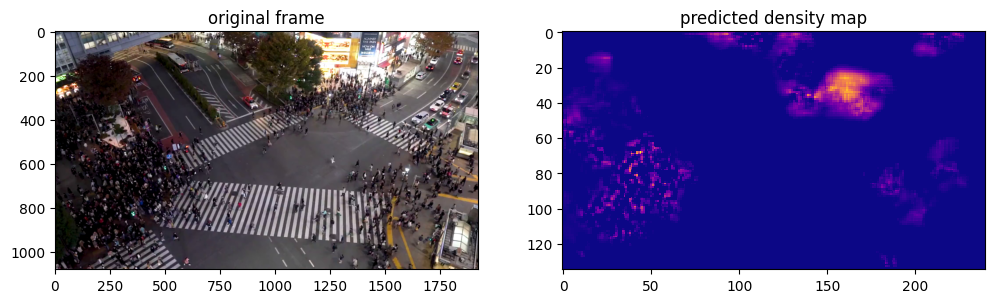

KeyboardInterrupt: 

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

video_path ='data/pexels-timo-volz-5544073(1080p).mp4'
cap = cv2.VideoCapture(video_path)

# check if video is opened successfully
if not cap.isOpened():
    print("Error: Could not open video")
    exit()

# iterate through each frame in the video
while True:
    # read a frame from the video
    ret, frame = cap.read()

    # break the loop if video is finished
    if not ret:
        break

    # convert he frame to rgb
    frame  = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # expend  dimensions to create a batch of size 
    input_frame = np.expand_dims(frame,axis=0)

    predicted_density_map = model.predict(input_frame)

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(frame)
    plt.title('original frame')

    plt.subplot(1,2,2)
    plt.imshow(predicted_density_map[0,:,:,0], cmap='plasma', interpolation='nearest')
    plt.title('predicted density map')

    plt.show(block=False)
    plt.pause(0.1)

    plt.close()

cap.release()


In [132]:
import cv2
import numpy as np
from matplotlib import cm

# Open the video file
video_path = "data/pexels-timo-volz-5544073(1080p).mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Create windows for the original video and the predicted density map
cv2.namedWindow("Original Video", cv2.WINDOW_NORMAL)
cv2.namedWindow("Predicted Density Map", cv2.WINDOW_NORMAL)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    input_frame = np.expand_dims(frame_rgb, axis=0)

    predicted_density_map = model.predict(input_frame)

    # Resize the predicted density map to match the height of the video frame
    predicted_density_map_resized = cv2.resize(predicted_density_map[0, :, :, 0], (frame_rgb.shape[1], frame_rgb.shape[0]))

    # Normalize predicted density map values to range [0, 1]
    normalized_density_map = cv2.normalize(predicted_density_map_resized, None, 0, 1, cv2.NORM_MINMAX)

    # Apply a colormap (e.g., jet)
    colored_density_map = (cm.jet(normalized_density_map) * 255).astype(np.uint8)

    # Convert the colored density map to RGB format
    colored_density_map_rgb = cv2.cvtColor(colored_density_map, cv2.COLOR_BGR2RGB)

    # Combine the original frame with the colored density map
    #combined_image = cv2.addWeighted(frame_rgb, 0.7, colored_density_map_rgb, 0.3, 0)

    # Display the original video in one window
    cv2.imshow("Original Video", frame_rgb)

    # Display the predicted density map in another window with adjusted color mapping
    cv2.imshow("Predicted Density Map", colored_density_map_rgb)

    # Display the combined image with enhanced crowd visibility
    #cv2.imshow("Combined Image", combined_image)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# working and + combined images, and slow fps

1/1 [==============================] - 2s 2s/step


In [141]:
import cv2
import numpy as np
from matplotlib import cm

# Open the video file
video_path = "data/pexels_videos_1677252(720p).mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get the original video's width, height, and fps
width = int(cap.get(3))
height = int(cap.get(4))
fps = cap.get(5)

# Create windows for the original video and the predicted density map
cv2.namedWindow("Original Video", cv2.WINDOW_NORMAL)
cv2.namedWindow("Predicted Density Map", cv2.WINDOW_NORMAL)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    input_frame = np.expand_dims(frame_rgb, axis=0)

    predicted_density_map = model.predict(input_frame)

    # Resize the predicted density map to match the height and width of the original video frame
    predicted_density_map_resized = cv2.resize(predicted_density_map[0, :, :, 0], (width, height))

    # Normalize predicted density map values to range [0, 1]
    normalized_density_map = cv2.normalize(predicted_density_map_resized, None, 0, 1, cv2.NORM_MINMAX)
    
    # Apply a colormap (e.g., plasma)
    colored_density_map = (cm.plasma(normalized_density_map) * 255).astype(np.uint8)

    # Convert the colored density map to RGB format
    colored_density_map_rgb = cv2.cvtColor(colored_density_map, cv2.COLOR_BGR2RGB)

    # Display the original video in one window
    cv2.imshow("Original Video", frame)

    # Display the predicted density map in another window with adjusted color mapping
    cv2.imshow("Predicted Density Map", colored_density_map_rgb)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# original spped , plasma

1/1 [==============================] - 1s 713ms/step


In [137]:
import cv2
import numpy as np
from matplotlib import cm

# Open the video file
video_path = "data/pexels_videos_1677252(720p).mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get the original video's width, height, and fps
width = int(cap.get(3))
height = int(cap.get(4))
fps = cap.get(5)

# Create windows for the original video and the predicted density map
cv2.namedWindow("Original Video", cv2.WINDOW_NORMAL)
cv2.namedWindow("Predicted Density Map", cv2.WINDOW_NORMAL)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    input_frame = np.expand_dims(frame_rgb, axis=0)

    predicted_density_map = model.predict(input_frame)

    # Resize the predicted density map to match the height and width of the original video frame
    predicted_density_map_resized = cv2.resize(predicted_density_map[0, :, :, 0], (width, height))

    # Normalize predicted density map values to range [0, 1]
    normalized_density_map = cv2.normalize(predicted_density_map_resized, None, 0, 1, cv2.NORM_MINMAX)
    
    # Apply a colormap (e.g., plasma)
    colored_density_map = (cm.jet(normalized_density_map) * 255).astype(np.uint8)

    # Convert the colored density map to RGB format
    colored_density_map_rgb = cv2.cvtColor(colored_density_map, cv2.COLOR_BGR2RGB)

    # Display the original video in one window
    cv2.imshow("Original Video", frame)

    # Display the predicted density map in another window with adjusted color mapping
    cv2.imshow("Predicted Density Map", colored_density_map_rgb)

    delay = int(1000 / 8)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# original speed , jet

1/1 [==============================] - 1s 688ms/step


In [139]:
import cv2
import numpy as np
from matplotlib import cm

# Open the video file
video_path = "data/pexels_videos_1677252(720p).mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get the original video's width, height, and fps
width = int(cap.get(3))
height = int(cap.get(4))
fps = cap.get(5)

# Create windows for the original video and the predicted density map
cv2.namedWindow("Original Video", cv2.WINDOW_NORMAL)
cv2.namedWindow("Predicted Density Map", cv2.WINDOW_NORMAL)

# Set a skip_frames variable to control how many frames to skip during processing
skip_frames = 5
frame_count = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break

    frame_count += 1

    if frame_count % skip_frames != 0:
        continue

    # Resize the frame to a smaller size for faster processing
    frame_resized = cv2.resize(frame, (640, 640))  # Adjust the size as needed

    frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)

    input_frame = np.expand_dims(frame_rgb, axis=0)

    predicted_density_map = model.predict(input_frame)

    # Resize the predicted density map to match the height and width of the original video frame
    predicted_density_map_resized = cv2.resize(predicted_density_map[0, :, :, 0], (width, height))

    # Normalize predicted density map values to range [0, 1]
    normalized_density_map = cv2.normalize(predicted_density_map_resized, None, 0, 1, cv2.NORM_MINMAX)
    
    # Apply a colormap (e.g., plasma)
    colored_density_map = (cm.jet(normalized_density_map) * 255).astype(np.uint8)

    # Convert the colored density map to RGB format
    colored_density_map_rgb = cv2.cvtColor(colored_density_map, cv2.COLOR_BGR2RGB)

    # Display the original video in one window
    cv2.imshow("Original Video", frame_resized)

    # Display the predicted density map in another window with adjusted color mapping
    cv2.imshow("Predicted Density Map", colored_density_map_rgb)

    delay = int(1000 / 8)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
# workign normal one with jet1

1/1 [==============================] - 0s 321ms/step


In [126]:
import cv2
import numpy as np
from matplotlib import cm

# Open the video file
video_path = "data/pexels_videos_1677252(720p).mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get the original video's width, height, and fps
width = int(cap.get(3))
height = int(cap.get(4))
fps = cap.get(5)

# Create windows for the original video and the predicted density map
cv2.namedWindow("Original Video", cv2.WINDOW_NORMAL)
cv2.namedWindow("Predicted Density Map", cv2.WINDOW_NORMAL)

# Set a skip_frames variable to control how many frames to skip during processing
skip_frames = 5
frame_count = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break

    frame_count += 1

    if frame_count % skip_frames != 0:
        continue

    # Resize the frame to a smaller size for faster processing
    frame_resized = cv2.resize(frame, (640, 640))  # Adjust the size as needed

    frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)

    input_frame = np.expand_dims(frame_rgb, axis=0)

    predicted_density_map = model.predict(input_frame)

    # Resize the predicted density map to match the height and width of the original video frame
    predicted_density_map_resized = cv2.resize(predicted_density_map[0, :, :, 0], (width, height))

    # Normalize predicted density map values to range [0, 1]
    normalized_density_map = cv2.normalize(predicted_density_map_resized, None, 0, 1, cv2.NORM_MINMAX)
    
    # Apply a colormap (e.g., plasma)
    colored_density_map = (cm.plasma(normalized_density_map) * 255).astype(np.uint8)

    # Convert the colored density map to RGB format
    colored_density_map_rgb = cv2.cvtColor(colored_density_map, cv2.COLOR_BGR2RGB)

    # Display the original video in one window
    cv2.imshow("Original Video", frame_resized)

    # Display the predicted density map in another window with adjusted color mapping
    cv2.imshow("Predicted Density Map", colored_density_map_rgb)

    delay = int(1000 / 8)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
# workign normal one with plasma1

1/1 [==============================] - 0s 331ms/step


In [142]:
import cv2
import numpy as np
from matplotlib import cm

# Open the video file
video_path = "data/pexels_videos_1677252(720p).mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get the original video's width, height, and fps
width = int(cap.get(3))
height = int(cap.get(4))
fps = cap.get(5)

# Create windows for the original video and the predicted density map
cv2.namedWindow("Original Video", cv2.WINDOW_NORMAL)
cv2.namedWindow("Predicted Density Map", cv2.WINDOW_NORMAL)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Resize the frame to a smaller size for faster processing
    frame_resized = cv2.resize(frame, (640, 640))  # Adjust the size as needed

    frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)

    input_frame = np.expand_dims(frame_rgb, axis=0)

    predicted_density_map = model.predict(input_frame)

    # Resize the predicted density map to match the height and width of the original video frame
    predicted_density_map_resized = cv2.resize(predicted_density_map[0, :, :, 0], (width, height))

    # Normalize predicted density map values to range [0, 1]
    normalized_density_map = cv2.normalize(predicted_density_map_resized, None, 0, 1, cv2.NORM_MINMAX)
    
    # Apply a colormap (e.g., plasma)
    colored_density_map = (cm.plasma(normalized_density_map) * 255).astype(np.uint8)

    # Convert the colored density map to RGB format
    colored_density_map_rgb = cv2.cvtColor(colored_density_map, cv2.COLOR_BGR2RGB)

    # Display the original video in one window
    cv2.imshow("Original Video", frame_resized)

    # Display the predicted density map in another window with adjusted color mapping
    cv2.imshow("Predicted Density Map", colored_density_map_rgb)

    delay = int(1000 / fps)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# original speed with jet


1/1 [==============================] - 0s 334ms/step
